In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

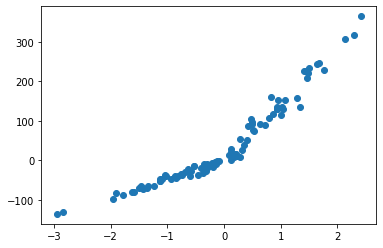

In [ ]:
x,y =make_regression(n_samples=100,n_features=1,noise=10)
y=y+abs(y/2)
plt.scatter(x,y)

In [ ]:
print(x.shape)
y=y.reshape(y.shape[0],1)
print(y.shape)


(100, 1)
(100, 1)


In [ ]:
X=np.hstack((x,np.ones(x.shape)))
X=np.hstack((x**2,X))
print(X.shape)
print(X[:10])

(100, 3)
[[ 1.28785092e-01  3.58866399e-01  1.00000000e+00]
 [ 3.62334737e+00 -1.90350922e+00  1.00000000e+00]
 [ 2.40000515e+00 -1.54919500e+00  1.00000000e+00]
 [ 8.85807228e-02 -2.97625138e-01  1.00000000e+00]
 [ 8.81540917e-02  2.96907547e-01  1.00000000e+00]
 [ 2.05176262e-03  4.52963864e-02  1.00000000e+00]
 [ 3.90326562e+00  1.97566840e+00  1.00000000e+00]
 [ 1.38913402e-01  3.72710882e-01  1.00000000e+00]
 [ 2.92770692e-01  5.41082888e-01  1.00000000e+00]
 [ 1.01868249e+00  1.00929802e+00  1.00000000e+00]]


In [ ]:
theta=np.random.randn(3,1)
theta

array([[ 0.18472884],
       [-0.60297342],
       [-0.20886042]])

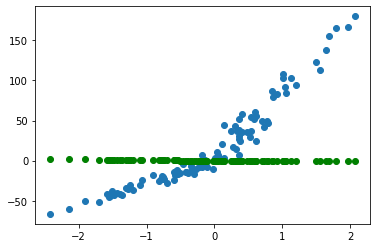

In [ ]:
#model
def model(X,theta) :
    return X.dot(theta)
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],model(X,theta),c='g')

In [ ]:
#function_cout
def function_cout(X,y,theta):
    m=len(y)
    return 1/(2*m) *np.sum(( model(X,theta) - y )**2)
function_cout(X,y,theta)

1424.5212010064795

In [ ]:
#gradient
def gradient(x,y,theta):
    m=len(y)
    return 1/m *x.T.dot(model(x,theta)-y)
#gradient(X,y,theta)

In [ ]:
def gradient_decent(x,y,theta,learning_rate,n_iter):
     cost_history=np.zeros(n_iter)
     for i in range(0,n_iter):
        theta = theta -learning_rate*gradient(x,y,theta)
        cost_history[i]=function_cout(x,y,theta)
     return theta,cost_history

In [ ]:
theta_final,cost_history=gradient_decent(X,y,theta,learning_rate=0.01,n_iter=1000)
theta_final

array([[17.53148545],
       [61.35153038],
       [15.31553802]])

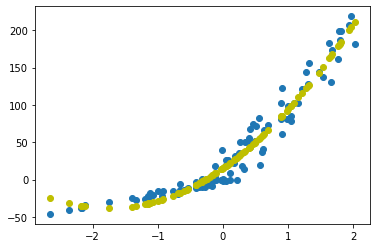

In [ ]:
prediction=model(X,theta_final)

plt.scatter(x[:,0],y)
plt.scatter(x[:,0],prediction,c="y")

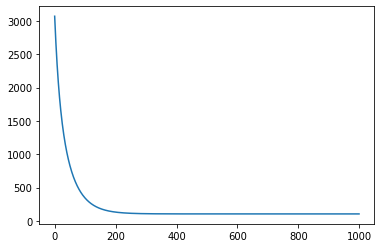

In [ ]:
plt.plot( range(1000),cost_history)

In [ ]:
def coef_determination(y,pred):
    u=((y-pred)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1-u/v

In [ ]:
coef_determination(y,prediction)

0.9543028613785689